# Clone Paddle Repo

In [1]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 20056, done.
remote: Counting objects: 100% (1734/1734), done.
remote: Compressing objects: 100% (687/687), done.
remote: Total 20056 (delta 1125), reused 1593 (delta 1042), pack-reused 18322
Receiving objects: 100% (20056/20056), 131.22 MiB | 25.98 MiB/s, done.
Resolving deltas: 100% (13418/13418), done.


# Get data

In [2]:
!gdown --id 1Ne7LZ3b1mvYECV_tFTrxKcQF4yqf0-mF

Downloading...
From: https://drive.google.com/uc?id=1Ne7LZ3b1mvYECV_tFTrxKcQF4yqf0-mF
To: /content/train.zip
542MB [00:06, 84.5MB/s]


In [3]:
!unzip /content/train.zip

Archive:  /content/train.zip
   creating: train/
   creating: train/images/
  inflating: train/images/train_0013.jpg  
  inflating: train/images/train_0345.jpg  
  inflating: train/images/train_0979.jpg  
  inflating: train/images/train_1205.jpg  
  inflating: train/images/train_0367.jpg  
  inflating: train/images/train_0533.jpg  
  inflating: train/images/train_0517.jpg  
  inflating: train/images/train_0948.jpg  
  inflating: train/images/train_0612.jpg  
  inflating: train/images/train_0408.jpg  
  inflating: train/images/train_0598.jpg  
  inflating: train/images/train_0127.jpg  
  inflating: train/images/train_0145.jpg  
  inflating: train/images/train_1185.jpg  
  inflating: train/images/train_0825.jpg  
  inflating: train/images/train_0426.jpg  
  inflating: train/images/train_0394.jpg  
  inflating: train/images/train_0208.jpg  
  inflating: train/images/train_0150.jpg  
  inflating: train/images/train_0229.jpg  
  inflating: train/images/train_0733.jpg  
  inflating: train/im

# If first time implement, run these block below


## Data:
 
> EAST required the following input data arrangement.

> You should put train and eval data into PaddleOCR/train_data


* Data consists of 2 annotation files and 2 folders of eval and train images. Each annotation and folder are for eval and train.

* You can obtain img data from this link:
https://rrc.cvc.uab.es/?ch=4&com=downloads
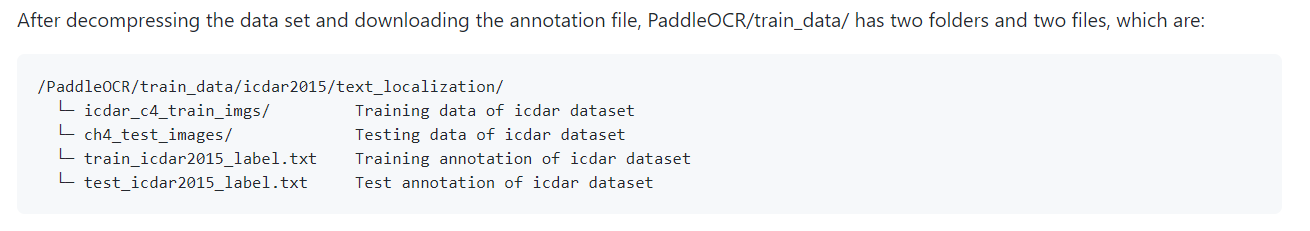

## Get pretrained_model: ResNet50 and MobileNetV3

In [ ]:
%cd PaddleOCR/
# !wget -P ./train_data/ https://paddleocr.bj.bcebos.com/dataset/train_icdar2015_label.txt
# !wget -P ./train_data/ https://paddleocr.bj.bcebos.com/dataset/test_icdar2015_label.txt
!wget -P ./pretrain_models/ https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV3_large_x0_5_pretrained.pdparams
!mkdir 'train_data'

Instal requirements for PaddleOCR

In [4]:
!pip install -r /content/PaddleOCR/requirements.txt

     |████████████████████████████████| 12.5 MB 15 kB/s 
     |████████████████████████████████| 948 kB 37.7 MB/s 
     |████████████████████████████████| 123 kB 49.2 MB/s 
     |████████████████████████████████| 2.7 MB 44.4 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 34.2 MB 16 kB/s 
     |████████████████████████████████| 197 kB 49.8 MB/s 
     |████████████████████████████████| 73 kB 1.5 MB/s 
     |████████████████████████████████| 190 kB 52.4 MB/s 
     |████████████████████████████████| 2.0 MB 33.5 MB/s 
     |████████████████████████████████| 41 kB 625 kB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
     |████████████████████████████████| 404 kB 40.7 MB/s 
     |████████████████████████████████| 1.9 MB 45.6 MB/s 
     |████████████████████████████████| 636 kB 37.5 MB/s 
     |████████████████████████████████| 98 kB 6.9 MB/s 
     |████████████████████████████████| 5.3 MB 41.2 MB/s 
     |████████████████████

In [5]:
!pip install paddlepaddle

     |████████████████████████████████| 108.9 MB 11 kB/s 


In [6]:
!pip install "paddleocr>=2.0.6"

     |████████████████████████████████| 236 kB 3.9 MB/s 


In [7]:
!pip install paddlepaddle-gpu

     |████████████████████████████████| 361.4 MB 28 kB/s 



## NOTE:
> Use **AnnotationConverter.py** to convert multiple label files into annotation format.

> Self code is encouraged, the annotation format is:
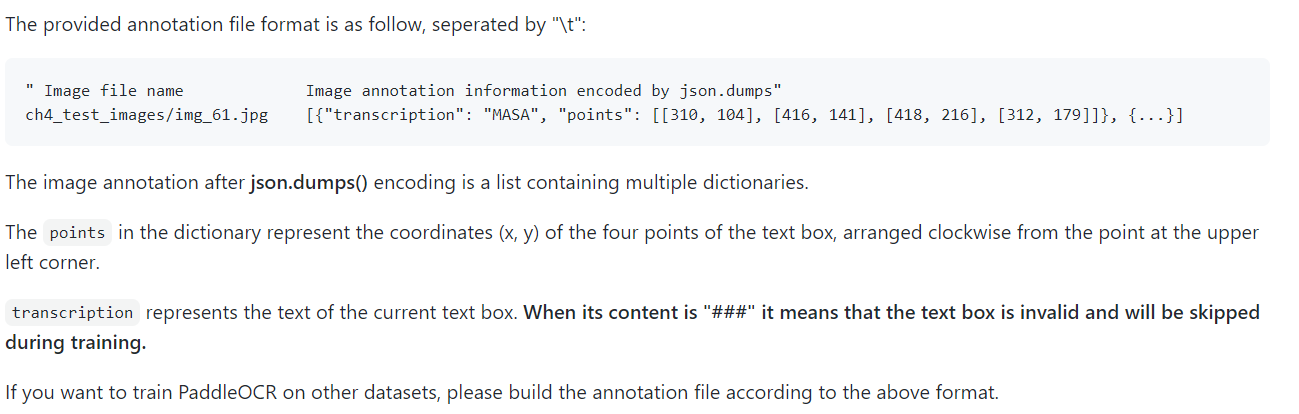

# Config model
> Open /content/PaddleOCR/configs/det/det_mv3_east.yml to adjust parameters for EAST model.

> Here are the important parameters:

**Global**:
* **use_gpu** : True
* Adjust **epoch_num**.
* The model after trained is saved under **save_model_dir**
* Adjust **save_epoch_step** (optional)
* **eval_batch_step**: [x, y] - Model will initiate evaluation every x iterations after the y_th iterations.
* **cal_metric_during_train**: Wether to evaluate during train or not (optional) - Linked with **eval_batch_step**
* **pretrained_model**: copy downloaded pretrained model's path, (*note*: delete the pretrained's extension ".pdparams" )
* **infer_img**: image/folder's path to predict.
* **checkpoints**: ./output/east_mv3/latest or ./output/east_mv3/best_accuracy (*note*: First time train is recommended)
* **save_res_path**: Predicted result is saved under [path].

**Train**:
* **data_dir**: PaddleOCR/train_data
* **label_file_list**: Annoted file's path.

**Eval**:
* **data_dir**: PaddleOCR/train_data
* **label_file_list**: Annoted file's path.

# NOTE:

> EAST configuration requires both **train** and **eval** inputed.
> You should split train data into eval in order to config the model. 

# Train data with EAST algorithms, using pretrained_model MobileNetV3.

In [ ]:
!python /content/PaddleOCR/tools/train.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml

[2021/08/01 06:00:27] root INFO: Architecture : 
[2021/08/01 06:00:27] root INFO:     Backbone : 
[2021/08/01 06:00:27] root INFO:         model_name : large
[2021/08/01 06:00:27] root INFO:         name : MobileNetV3
[2021/08/01 06:00:27] root INFO:         scale : 0.5
[2021/08/01 06:00:27] root INFO:     Head : 
[2021/08/01 06:00:27] root INFO:         model_name : small
[2021/08/01 06:00:27] root INFO:         name : EASTHead
[2021/08/01 06:00:27] root INFO:     Neck : 
[2021/08/01 06:00:27] root INFO:         model_name : small
[2021/08/01 06:00:27] root INFO:         name : EASTFPN
[2021/08/01 06:00:27] root INFO:     Transform : None
[2021/08/01 06:00:27] root INFO:     algorithm : EAST
[2021/08/01 06:00:27] root INFO:     model_type : det
[2021/08/01 06:00:27] root INFO: Eval : 
[2021/08/01 06:00:27] root INFO:     dataset : 
[2021/08/01 06:00:27] root INFO:         data_dir : /content/PaddleOCR/train_data
[2021/08/01 06:00:27] root INFO:         label_file_list : ['/content/Pad

# Evaluate model:


In [ ]:
 !python /content/PaddleOCR/tools/eval.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml -o Global.checkpoints="/content/output/east_mv3/latest"

# Get public test

In [ ]:
!gdown --id 1-E8X38I_h1NxacL6O6Defl6Zd_jbw3ph

Downloading...
From: https://drive.google.com/uc?id=1-E8X38I_h1NxacL6O6Defl6Zd_jbw3ph
To: /content/public_test.zip
320MB [00:02, 138MB/s]


In [ ]:
!unzip public_test.zip

# Test predicting with a new image:

> The result image is located under /content/output/det_east/det_results

> The result annotation file is located under /content/output/det_east/predicts_east.txt

> Remember to convert result annotation file to suitable submission format.



In [ ]:
!python /content/PaddleOCR/tools/infer_det.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml -o Global.infer_img="/content/public_test" Global.pretrained_model="/content/output/east_mv3/latest"

> Predict on a folder: 
```
 !python /content/PaddleOCR/tools/infer_det.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml -o Global.infer_img="/content/public_test" Global.pretrained_model="/content/output/east_mv3/latest"
 ```

# Submit

In [ ]:
df_submission = os.chdir('/content/submit_AI.txt')

import math, requests

def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
    TOKEN='6a9753e1551cbdcefe0ca601843b4ccc3aeefec4f0e5d7ee456a64031198b5439930be564238bb0debc8376f6553e33d9c6c11dca10531ca80edc9211ef00f5c'
    URL='http://submission.mmlab.uit.edu.vn/api/submissions'
    df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)
        
submit_prediction(df_submission, sep=',', index=True, comment='EAST')

# References:
https://github.com/PaddlePaddle/PaddleOCR

https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.1/doc/doc_en/detection_en.md